### Riccardo Cusinato - 3627460
### Giacomo Barzon - 3626438
### Damiano Sgarbossa - 3623971  

# Exercise 1.1 - Advection in 1D

### advection equation:
$$ \dfrac{ \partial q(x,t) }{ \partial t } + v \dfrac{ \partial q(x,t) }{ \partial x }=0 \ \ \ with \ v=const>0$$

### initial conditions:
$$ q(x,0) = \begin{cases} 
    1 \ for \ x<0 \\\\ 0 \ for \ x\geq0
\end{cases} $$

### boundary conditions:
$$ q(-L/2,t)=1 $$
$$ q(+L/2,t)=0 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set parameters
v = 1.
L = 10.
Nx = 100
dx = L / Nx
 
t = 3.
Nt = 100
dt = t / Nt

# create x array -> adding two ghost cells
x = np.arange(-dx, L+dx, dx) - L/2. + dx/2.

# total number of grid points
n = x.shape[0]

# initial condition
q0 = np.zeros(n)
q0[:int(n/2)] = 1.

# boundary conditions
ql = 1.
qr = 0.

### 1. Write a program to perform this numerical integration using the symmetric numerical derivative operator $(q_{i+1} − q_{i−1})/2\Delta x$. You can show that this will lead to a numerical instability.

In [3]:
# define an integrator for different convolution kernel
def integrate(q0, ql, qr, t, dt, dx, v, kernel):
    Nt = int(t / dt)
    n = q0.shape[0]
    
    # create empty array
    q = np.zeros(( Nt+1,n ))
    
    # set initial conditions
    q[0] = q0

    # loop over time steps
    for i in range(Nt):
        q[i+1] = q[i] - v * np.convolve(q[i], kernel, 'same') * dt / dx
        
        # set boundary conditions
        q[i+1,0] = ql
        q[i+1,-1] = qr
        
    return q

In [4]:
# symmetric derivative
kernel_symm = [.5,0.,-.5]
q_symm = integrate(q0, ql, qr, t, dt, dx, v, kernel_symm)

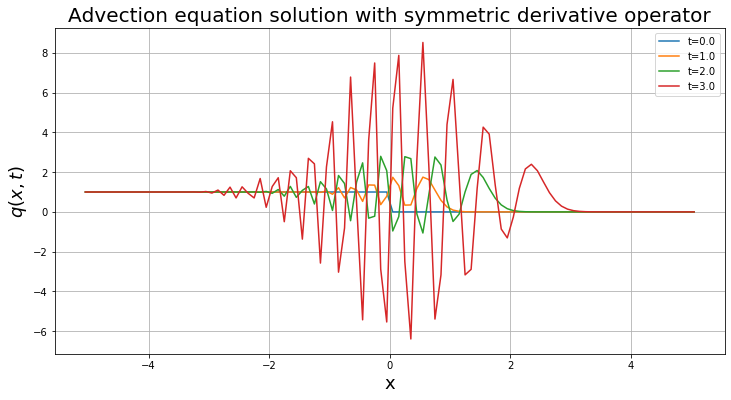

In [5]:
# set some time points
times = np.array([0., 1., 2., 3.]) / dt
times = times.astype(int)

# plot solution
fig1 = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q_symm[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with symmetric derivative operator', fontsize=20)
plt.show(fig1)

### 2. Now use the one-sided numerical derivative operator $(q_{i} − q_{i−1})/\Delta x$. Show that this so called upwind scheme stays stable.

In [6]:
kernel_upwind = np.array([0.,1.,-1.])
q_upwind = integrate(q0, ql, qr, t, dt, dx, v, kernel_upwind)

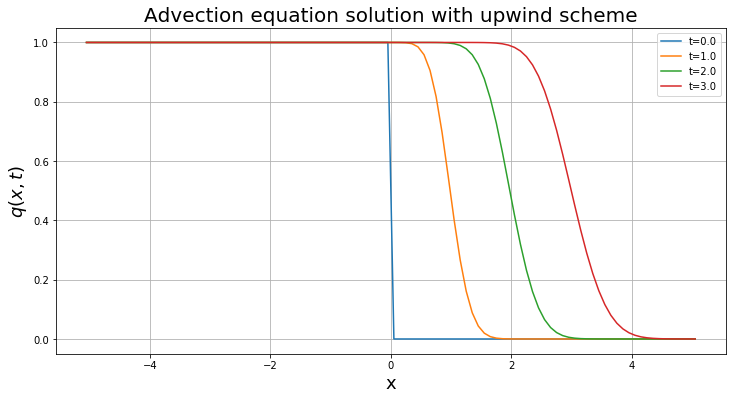

In [7]:
# plot solution
fig1 = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q_upwind[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with upwind scheme', fontsize=20)
plt.show(fig1)

### 3. Now use the one-sided numerical derivative operator $(q_{i+1} − q_{i})/\Delta x$. Show that this approach is unstable again.

In [8]:
kernel_sided = np.array([1.,-1.,0.])
q_sided = integrate(q0, ql, qr, t, dt, dx, v, kernel_sided)

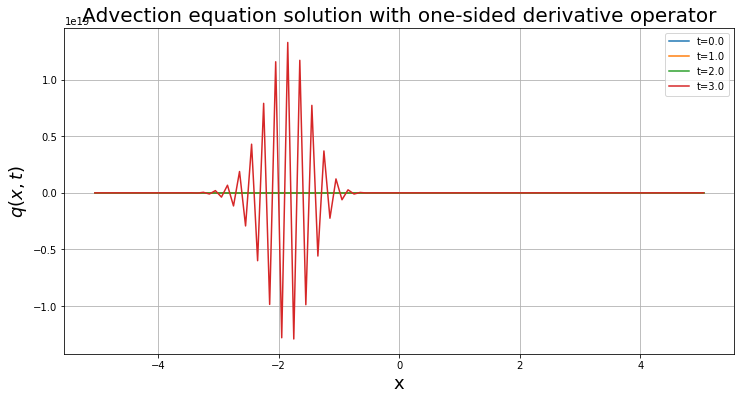

In [9]:
# plot solution
fig1 = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q_sided[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with one-sided derivative operator', fontsize=20)
plt.show(fig1)

### 4. Put the left boundary condition to q(−L/2, t) = 0.5.

In [10]:
ql = 0.5
q0[0] = ql

q = integrate(q0, ql, qr, t, dt, dx, v, kernel_upwind)

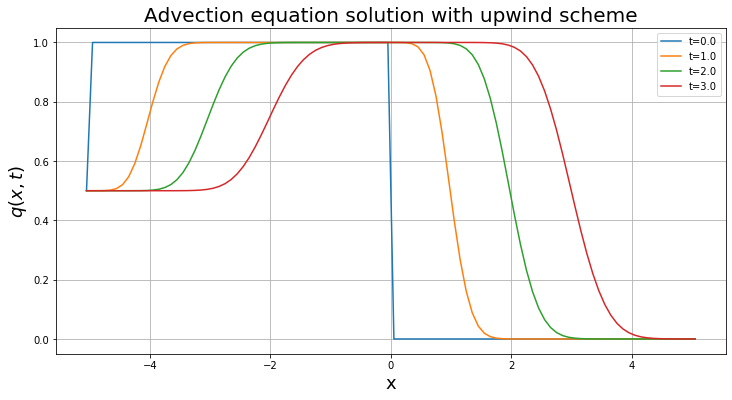

In [11]:
# plot solution
fig1 = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q[i], label='t=%.1f'%(i*dt) )
    #plt.plot( x, q[i], '.', label='t=%.1f'%(i*dt))
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with upwind scheme', fontsize=20)
plt.show(fig1)

### What happens, and why?

In this case the initial profile q(x,t=0) has a discontiuity also in the left boundary and we can see the propagation of the initial profile to the right.

### 5. Reset, and put the right boundary condition to q(+L/2, t) = 0.5. What happens, and why?

In [12]:
ql = 1.
qr = 0.5
q0[0] = ql
q0[-1] = qr

q = integrate(q0, ql, qr, t, dt, dx, v, kernel_upwind)

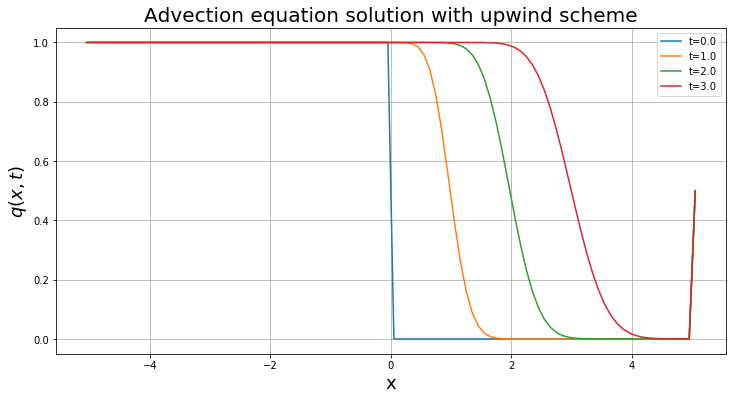

In [13]:
# plot solution
fig1 = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with upwind scheme', fontsize=20)
plt.show(fig1)

### What happens, and why?

In this case there is no difference with respect to the initial configuration, because by using the upwind scheme the information is propagated from the left to the right, so the the discontinuity on the right boundary does not affect the algorithm.

### 6. Now use a 10× smaller time step, i.e. take 1000 time steps between t = 0 and t = 3.

In [14]:
newNt = 1000
dt = t / newNt

ql = 1.
qr = 0.
q0[0] = ql
q0[-1] = qr

q = integrate(q0, ql, qr, t, dt, dx, v, kernel_upwind)

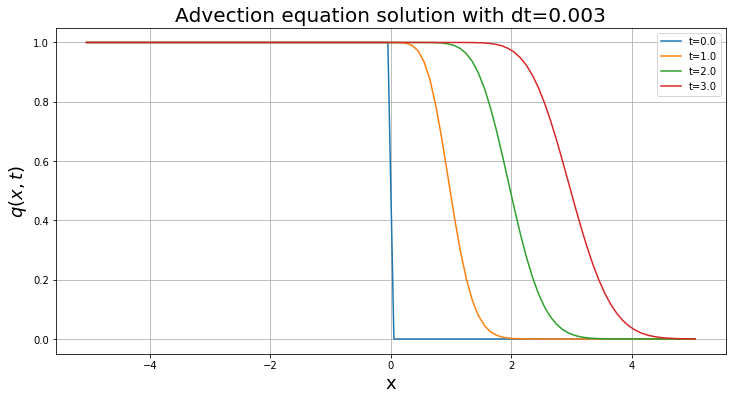

In [15]:
# plot solution
times = np.array([0., 1., 2., 3.]) / dt
times = times.astype(int)

fig1 = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with dt=%.3f' %dt, fontsize=20)
plt.show(fig1)

### What is the difference in the result at t = 3? Does it become better or worse?

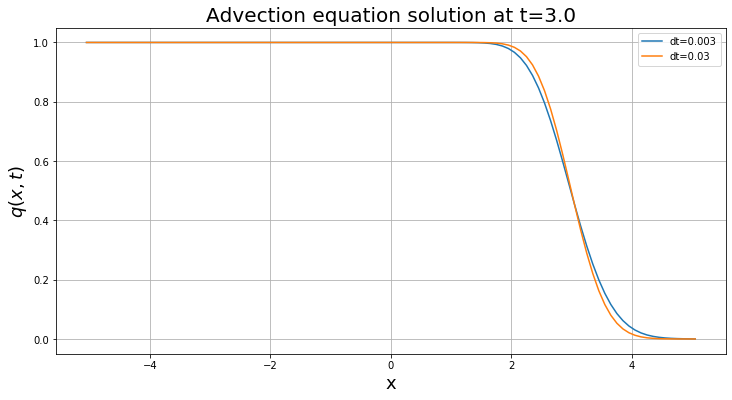

In [16]:
# plot solution at t=3
fig1 = plt.subplots(figsize=[12,6])

plt.plot( x, q[-1], label='dt=%.3f' %(t/newNt) )
plt.plot( x, q_upwind[-1], label='dt=%.2f' %(t/Nt) )
#plt.plot( x, q1[-1], label='dt=%.2f' %(t/Nt) )

plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution at t=%.1f' %t, fontsize=20)
plt.show(fig1)

As we can notice from the plot above, there is a slight difference by using a smaller timestep, because the wavefront is smoother.

### 7. Now use a 10× larger time step, i.e. take 10 time steps between t = 0 and t = 3.

In [17]:
Nt = 10
dt = t / Nt

q = integrate(q0, ql, qr, t, dt, dx, v, kernel_upwind)

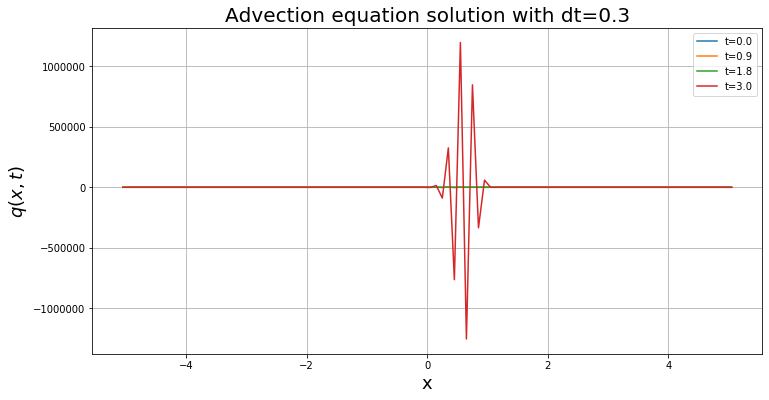

In [18]:
# plot solution
times = np.array([0., 1., 2., 3.]) / dt
times = times.astype(int)

fig1 = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with dt=%.1f' %dt, fontsize=20)
plt.show(fig1)

### Explain what happens.

In this case the timestep is too big so the algorithm is not able to converge.

# Exercise 1.2 - General-purpose 1D advection subroutine/function 

Now let us create a general-purpose computer function for the purpose of 1D numerical advection of any given 1D function q(x, t) (represented as a 1D array qin) for any given velocity (also represented as a 1D array vi+1/2). The function should receive the current values of qin, the velocities vi+1/2 and a time step size ∆t.

In [19]:
# Define an updating function
def advect(qold, vold, dx, dt):
    kernel_pos = np.array([0.,1.,-1.])    # upwind scheme for positive velocity
    kernel_neg = np.array([1.,-1.,0.])    # upwind scheme for negative velocity
    
    q = np.zeros((len(qold)))
    
    for i in range(1,len(qold)-1):
        if vold[i]>=0:
            q[i] = qold[i] - vold[i] * np.convolve(qold, kernel_pos, 'same')[i] * dt / dx    # update cell value
        else:
            q[i] = qold[i] - vold[i] * np.convolve(qold, kernel_neg, 'same')[i] * dt / dx
    

    q[0] = qold[0]       # boundary conditions 
    q[-1] = qold[-1]

    return q
    

# Define function to integrate over time
def integrate(t, advect, *args):
    qold, vold, dx, dt = args[0], args[1], args[2], args[3]
    Nt = int(t / dt)
    n = qold.shape[0]
    
    # create empty array
    q = np.zeros(( Nt+1,n ))
    
    # set initial conditions
    q[0] = qold

    # loop over time steps
    for i in range(Nt):
        q[i+1] = advect(q[i], vold, dx, dt)
        
    return q

### 8. Apply your function to exercise 1.1 above (with a constant velocity v = 1) and convince yourself that your function reproduces the same results.

In [20]:
# initial profiles 

L = 10.
Nx = 100
dx = L / Nx
 
t = 3.
Nt = 100
dt = t / Nt

# create x array -> adding two ghost cells
x = np.arange(-dx, L+dx, dx) - L/2. + dx/2.

# total number of grid points
n = x.shape[0]

# initial condition
q0 = np.zeros(n)
q0[:int(n/2)] = 1.
v = np.ones((n-1))

# boundary conditions
ql = 1.
qr = 0.

q_gen = integrate(t, advect, q0, v, dx, dt)

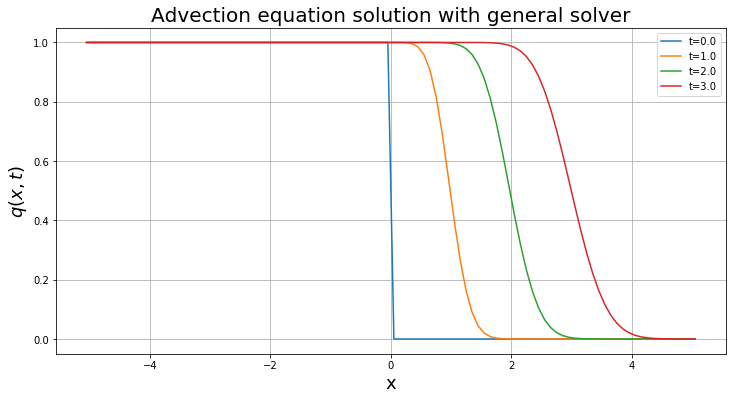

In [21]:
# Plot results
times = np.array([0., 1., 2., 3.]) / dt
times = times.astype(int)

fig_confr = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q_gen[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with general solver', fontsize=20)
plt.show(fig_confr)

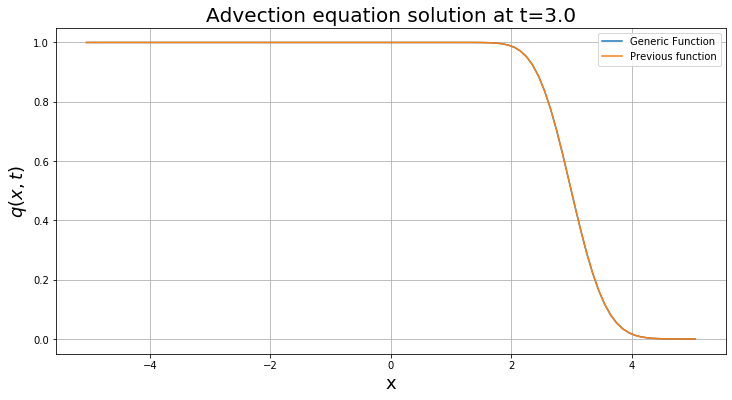

In [22]:
# Now compare with previous result
fig_confr2 = plt.subplots(figsize=[12,6])

plt.plot( x, q_gen[-1], label='Generic Function')
plt.plot( x, q_upwind[-1], label='Previous function')

plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution at t=%.1f' %t, fontsize=20)
plt.show(fig_confr2)

### 9. Now let us choose the velocity v(x) = -2x/L. This is a converging velocity field. Take as an initial density profile q(x, 0) = 1 for $|x| \leq L/4$ and q(x, 0) = 0 for $|x| > L/4$. Integrate again in time from t = 0 to t = 3 with 100 time steps. Plot the result at different times and explain the result.

In [23]:
Nx = 100
dx = L / Nx
x = np.arange(-dx, L+dx, dx) - L/2. + dx/2.
n = x.shape[0]

# Define velocity
new_x = x[1:] + dx/2
v = -2.*new_x/L

# initial condition
q0 = np.zeros(n)
q0[int(n/4):int(3*n/4)] = 1.

q_test = integrate(t, advect, q0, v, dx, dt)

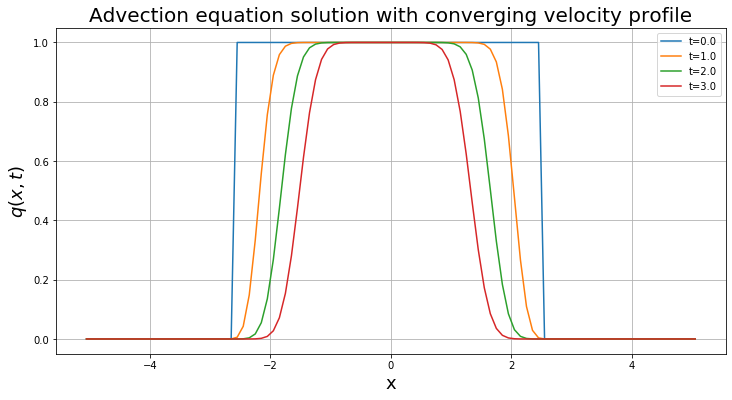

In [24]:
# Plot results
times = np.array([0., 1., 2., 3.]) / dt
times = times.astype(int)

fig_test = plt.subplots(figsize=[12,6])
for i in times:
    plt.plot( x, q_test[i], label='t=%.1f'%(i*dt) )
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$q(x,t)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Advection equation solution with converging velocity profile', fontsize=20)
plt.show(fig_confr)

We successfully checked that the general algorithm gives the same solution of the previous specific case when the velocity is constant. Then, for an arbitrary velocity, one has to take care of splitting the cases in which v is positive or negative by using the correct upwind algorithm. Then, also for this general case, the results are physically reasonable: indeed q is transported in the correct direction, i.e. positive for x<0 and negative for x>0 (compression on q in the center).